# Final Project Submission

Please fill out:
* Student name: Cynthia Adisa Khasoha
* Student pace: / part time / 
* Scheduled project review date/time: 24/07/2023
* Instructor name: Maryann Mwikali
* Blog post URL:


# Microsoft Movie Studio Needs Analysis
![microsoft-g608ed5064_1920.png](./images/8867.Microsoft_5F00_Logo_2D00_for_2D00_screen-1920x706.jpg)

# Overview

This project uses exploratory data analysis to generate insights for a business stakeholder

# Business problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Reading the title_basics dataset

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#using pandas to load the dataset
title_basics = pd.read_csv('./data/imdb.title.basics.csv.gz')
title_ratings =pd.read_csv('./data/imdb.title.ratings.csv.gz')
movie_gross =pd.read_csv('./data/bom.movie_gross.csv.gz')

In [3]:
# inspecting contents of the dataframe title_basics
title_basics.head(30)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [4]:
#getting a summary of the dataframe
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


# cleaning the title_basics dataset
From the datasets we can see redundancy and NaN values in some columns. Here Iam cleaning all the datasets removing redundancies resulting in a dataset with 2 less columns

In [5]:
#fill NaN values with mean in title_basics dataset
average_runtime = title_basics['runtime_minutes'].mean()
title_basics['runtime_minutes'].fillna(average_runtime, inplace=True)
#fill Nan genres
title_basics['genres'].fillna('Other categories', inplace=True)

In [6]:
#resolving redundancy between the primary title and original title columns
#merging original_title and primary_title
title_basics['merged_title'] = title_basics['primary_title'].combine_first(title_basics['original_title'])
title_basics['merged_title'].str.strip().str.title()

#deleting the 2 columns
title_basics.drop(columns=['original_title', 'primary_title'], inplace=True)


# Analysis
We want to now visualize the above information by plotting a bar graph of the top 30 genres and the top 30 runtime minutes.

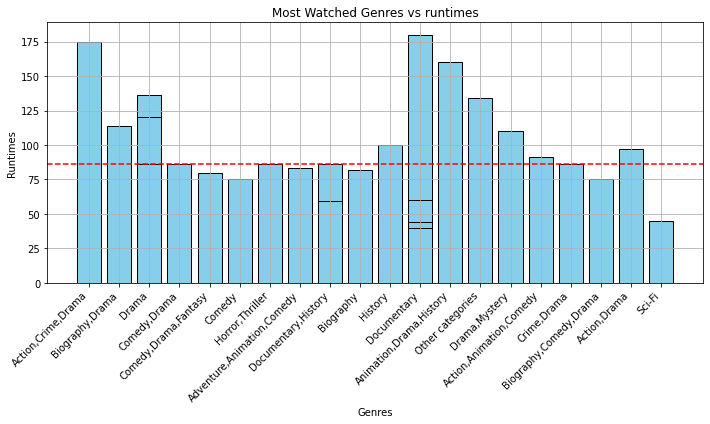

In [7]:
top_30_genres = title_basics['genres'].head(30)
top_runtimes = title_basics['runtime_minutes'].head(30)
plt.figure(figsize=(10, 6)) 
plt.bar(top_30_genres, top_runtimes, color='skyblue', edgecolor='black')
plt.xlabel('Genres')
plt.ylabel('Runtimes')
plt.axhline(average_runtime, color='red', linestyle='dashed') 
plt.title('Most Watched Genres vs runtimes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()



In [8]:
#In the code below, I first split the genres using the .str.split() method and create a new DataFrame genre_df with each genre in a separate row. 
#Then, I counted the occurrences of each genre in the filtered movies using value_counts()
#The genre_counts variable will contain the count of each genre in descending order. 
#I then used this information to plot a bar graph using plt.bar() to represent the number of movies in each genre with runtimes above 75 minutes.

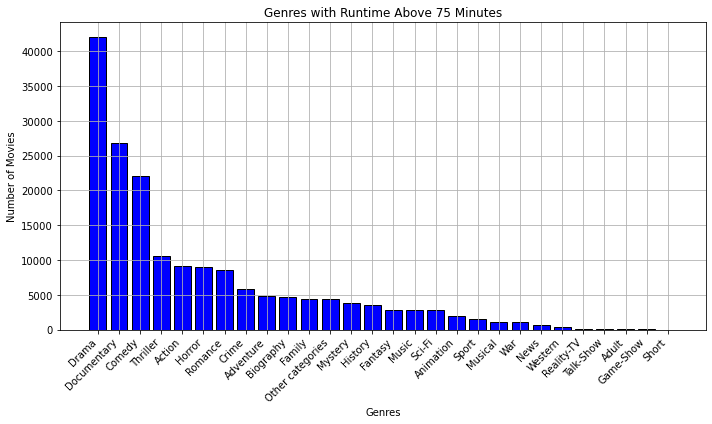

In [9]:
# Filter movies with runtimes above 75 minutes
filtered_movies = title_basics[title_basics['runtime_minutes'] > 75]

genre_df = filtered_movies['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# Count the occurrences of each genre in the filtered movies
genre_counts = genre_df.value_counts()

# Sort the genres based on the number of occurrences in descending order
sorted_genres = genre_counts.sort_values(ascending=False)

# Plot bar graph for genres with runtime above 75 minutes
plt.figure(figsize=(10, 6)) 
plt.bar(sorted_genres.index, sorted_genres.values, color='blue', edgecolor='black')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Genres with Runtime Above 75 Minutes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.grid(True)
plt.tight_layout()  # Adjust the spacing between the bars to prevent overlapping
plt.show()

# Findings
From the first graph we can see than most movie genres have an average runtime of above 75 minutes represented by the red line.
From the second graph above we can deduce the most famous movie genres and which genres have a runtime of above 75 min which can typically be regarded as the normal runtime of a movie

# Reading the title_ratings dataset

In [10]:
title_ratings.head(40)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [11]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# Analysis
having a linechart for the distribution of average rating vs number of votes. From the analysis we can gather that movies with a rating of 7 and above have the highest number of votes, movies between 5 and 7 have an average amount of votes while movies tites below 6 have the lowest votes. However there are movies with low votes and high rating for example 5 votes for a movie rated 8

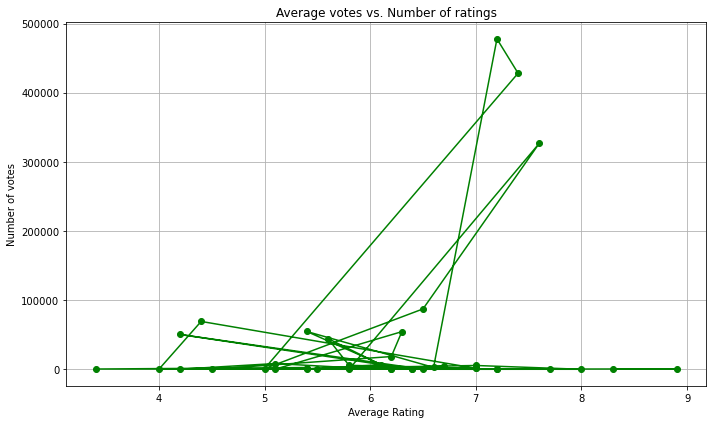

In [12]:
averagerating = title_ratings['averagerating'].head(40)
numvotes = title_ratings['numvotes'].head(40)

# Plot line chart for average rating vs. number of votes
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.plot( averagerating, numvotes, marker='o', color='green')
plt.xlabel('Average Rating')
plt.ylabel ('Number of votes')
plt.title('Average votes vs. Number of ratings')
plt.grid(True)
plt.tight_layout()
plt.show()



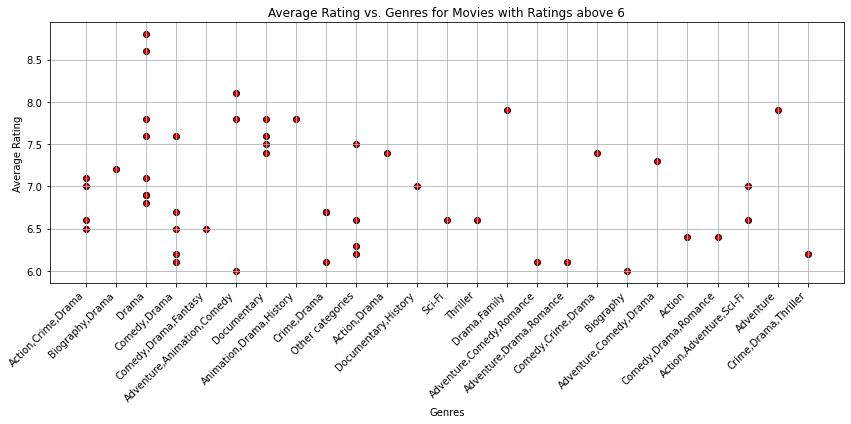

In [13]:
merged_df = title_basics.merge(title_ratings, on='tconst')

# Filter movies with ratings above 6
filtered_movies = merged_df[merged_df['averagerating'] >= 6].head(50)

# Create a scatter plot for genres vs. ratings for movies with ratings above 6
plt.figure(figsize=(12, 6))
plt.scatter(filtered_movies['genres'], filtered_movies['averagerating'], color='red', edgecolors='black')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Genres for Movies with Ratings above 6')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()



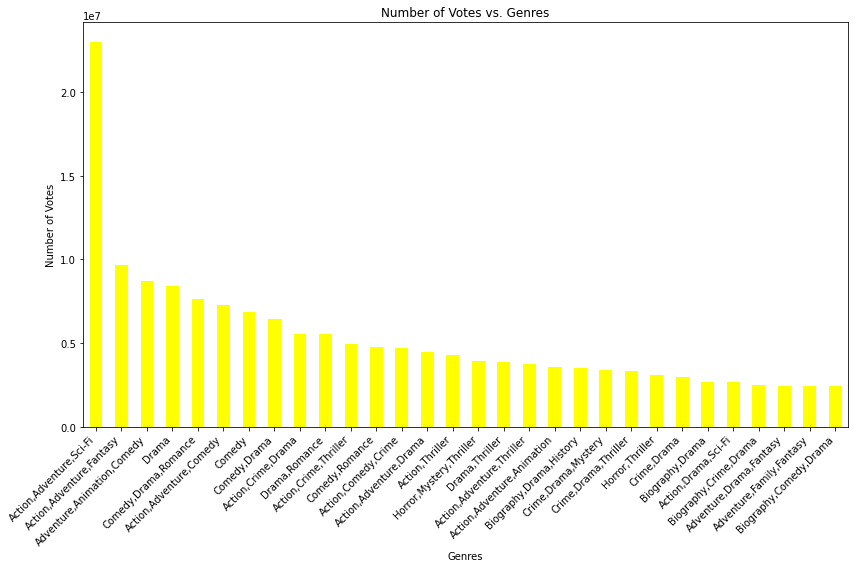

In [14]:
# Create a bar plot for number of votes and genres
genre_votes = merged_df.groupby('genres')['numvotes'].sum()

# Sort the genres based on number of votes in descending order
sorted_genres = genre_votes.sort_values(ascending=False)

# Select the top 30 genres
top_30_genres = sorted_genres.head(30)

# Create a bar plot for the number of votes vs. genres
plt.figure(figsize=(12, 8))
top_30_genres.plot(kind='bar', color='yellow')
plt.xlabel('Genres')
plt.ylabel('Number of Votes')
plt.title('Number of Votes vs. Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Reading the movie_gross dataset

In [15]:
movie_gross.head(30)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [16]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Data cleaning

In [17]:
# Convert 'domestic_gross' and 'foreign_gross' columns to numeric, replacing non-numeric values with NaN
movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'], errors='coerce')
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

# Drop rows with NaN values in 'domestic_gross' or 'foreign_gross' columns
movies_df = movie_gross.dropna(subset=['domestic_gross', 'foreign_gross'])
movies_df.head(20)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010
6,Iron Man 2,Par.,312400000.0,311500000.0,2010
7,Tangled,BV,200800000.0,391000000.0,2010
8,Despicable Me,Uni.,251500000.0,291600000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010


# Analysis

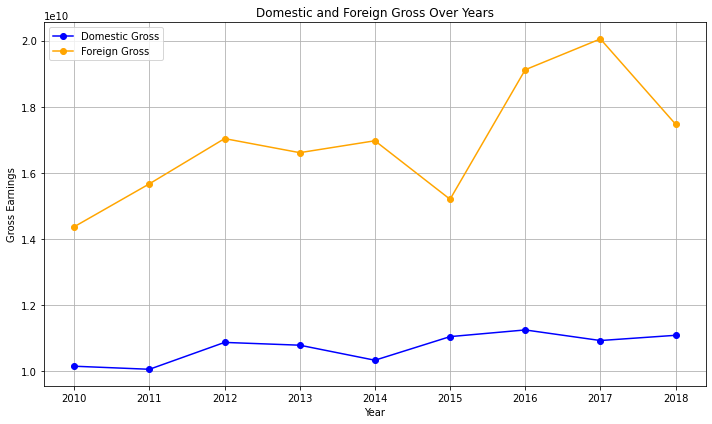

In [20]:
#line graph to show domestic and foreign gross over the years
yearly_gross = movie_gross.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_gross.index, yearly_gross['domestic_gross'], marker='o', label='Domestic Gross', color='blue')
plt.plot(yearly_gross.index, yearly_gross['foreign_gross'], marker='o', label='Foreign Gross', color='orange')

plt.xlabel('Year')
plt.ylabel('Gross Earnings')
plt.title('Domestic and Foreign Gross Over Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#from the above graph we see that the studios have more earnings with the foreign gross than domestic gross meaning t could mean that these studios have a strong international presence 
#and are able to generate significant revenue from foreign markets.

In [ ]:
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
studio_total_gross = (movie_gross.groupby('studio')['total_gross'].sum()).head(30)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(studio_total_gross.index, studio_total_gross.values, color='lightblue')
plt.bar(highest_gross_studio, studio_total_gross[highest_gross_studio], color='orange')
plt.xlabel('Studio')
plt.ylabel('Total Gross(millions)')
plt.title('Total Gross by Studio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
#from the above grapgh we can see from the sample of the movie_gross dataset that the studio with the highest total gross is A24
#This indicates that the highest grossing studio has been more successful in
#terms of box office revenue compared to other studios in the dataset.